## Twitter Sentiment Investment Stratergy

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
plt.style.use('ggplot')

# data_folder = "C:/Users/codyr/Desktop/Coding_/Quant_Trading_Basics"

# sentiment_df = pd.read_csv(os.path.join(data_folder, 'sentiment_data.csv'))

# sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# sentiment_df = sentiment_df.set_index(['date', 'symbol'])

# sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

# sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20)&(sentiment_df['twitterComments']<10)]

sentiment_df

#### Aggregate Monthly sentiment ratios and calculate monthly averages

In [13]:
sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 DIS             65.0              6.0         108.0   
           MA              21.0              4.0          40.0   
           V               48.0              4.0          29.0   
2021-11-20 V              137.0              5.0          54.0   
2021-11-22 K               24.0              6.0          39.0   
...                         ...              ...           ...   
2023-01-03 MRO            205.0              7.0          62.0   
2023-01-04 CCL            261.0              0.0          26.0   
           D               56.0              8.0          28.0   
           DAL            234.0              7.0          39.0   
           TMO             21.0              2.0          32.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 DIS               313479.0               NaN          0.055556  
           MA                 78938.0               NaN          0.100000  
           V                  92684.0               NaN          0.137931  
2021-11-20 V                 529870.0               NaN          0.092593  
2021-11-22 K                 221584.0               NaN          0.153846  
...                               ...               ...               ...  
2023-01-03 MRO               236415.0          0.610525          0.112903  
2023-01-04 CCL               124875.0          0.635317          0.000000  
           D                  61203.0          0.614083          0.285714  
           DAL               112431.0          0.538929          0.179487  
           TMO                30857.0          0.610020          0.062500  

[634 rows x 6 columns]

In [25]:
aggregated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='ME'), 'symbol'])
 [['engagement_ratio']].mean())

aggregated_df['rank'] = (aggregated_df.groupby(level=0)['engagement_ratio']
                         .transform(lambda x: x.rank(ascending=False)))

aggregated_df

engagement_ratio  rank
date       symbol                        
2021-11-30 ABT             0.243590   2.0
           DIS             0.055556   8.0
           EBAY            0.250000   1.0
           GS              0.117647   5.0
           K               0.153846   4.0
...                             ...   ...
2023-01-31 DAL             0.179487   3.0
           EBAY            0.186047   2.0
           MRO             0.112903   4.0
           NUE             0.071429   5.0
           TMO             0.062500   7.0

[307 rows x 2 columns]

### Select the top 5 stocks based on their cross-sectional ranking for each month

In [35]:
# filtered_df = aggregated_df[aggregated_df['rank']<6].copy()

# filtered_df = filtered_df.reset_index(level=1)

# filtered_df.index = filtered_df.index+pd.DateOffset(1)

# filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 ABT             0.243590   2.0
           EBAY            0.250000   1.0
           GS              0.117647   5.0
           K               0.153846   4.0
           KO              0.200000   3.0
2022-01-01 A               0.234114   5.0
           C               0.296296   3.0
           D               0.428571   1.0
           EA              0.333333   2.0
           KEY             0.250000   4.0
2022-02-01 ABT             0.212500   3.0
           D               0.243590   2.0
           DD              0.200000   4.0
           ILMN            0.181818   5.0
           SLB             0.258065   1.0
2022-03-01 A               0.230769   2.0
           AAP             0.363636   1.0
           BKR             0.167795   5.0
           ILMN            0.193548   4.0
           STZ             0.228571   3.0

### Extract the stocks to form portfolios with at the start of each new month

In [40]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2021-12-01': ['ABT', 'EBAY', 'GS', 'K', 'KO'],
 '2022-01-01': ['A', 'C', 'D', 'EA', 'KEY'],
 '2022-02-01': ['ABT', 'D', 'DD', 'ILMN', 'SLB'],
 '2022-03-01': ['A', 'AAP', 'BKR', 'ILMN', 'STZ'],
 '2022-04-01': ['A', 'DD', 'EA', 'EBAY', 'EL'],
 '2022-05-01': ['BIIB', 'EA', 'EL', 'ILMN', 'L'],
 '2022-06-01': ['AES', 'D', 'GILD', 'NUE', 'RCL'],
 '2022-07-01': ['BIIB', 'HON', 'L', 'NCLH', 'RCL'],
 '2022-08-01': ['AAP', 'AES', 'EA', 'ILMN', 'STZ'],
 '2022-09-01': ['CB', 'DLTR', 'EBAY', 'GILD', 'MRO'],
 '2022-10-01': ['D', 'EL', 'K', 'MRO', 'SLB'],
 '2022-11-01': ['AEP', 'DVN', 'ILMN', 'MNST', 'RCL'],
 '2022-12-01': ['D', 'J', 'MNST', 'NUE', 'STZ'],
 '2023-01-01': ['BMY', 'DD', 'DLTR', 'MRO', 'SLB'],
 '2023-02-01': ['D', 'DAL', 'EBAY', 'MRO', 'NUE']}

### Download the fresh stock prices for only selected stocks

In [43]:
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

prices_df = yf.download(tickers=stocks_list,
                        start='2021-01-01',
                        end='2023-03-01')

[*********************100%***********************]  53 of 54 completed

1 Failed download:
['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


### Calculate portfolio returns with monthly rebalancing

In [85]:
returns_df = np.log(prices_df['Adj Close']).diff().dropna(how='all')

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():

    end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

    cols = fixed_dates[start_date]

    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')

    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)

### Download NASDAQ/QQQ prices and calculate returns to compare to our stratergy

In [86]:
qqq_df = yf.download(tickers='QQQ',
                     start='2021-01-01',
                     end='2023-03-01')

qqq_ret = np.log(qqq_df['Adj Close']).diff()


qqq_ret = qqq_ret.rename(columns={'QQQ':'nasdaq_return'})

portfolio_df = portfolio_df.merge(qqq_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%***********************]  1 of 1 completed


,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.002793,-0.017159
2021-12-02,0.016209,0.007181
2021-12-03,0.004336,-0.017541
2021-12-06,0.010695,0.007981
2021-12-07,0.008394,0.029669
...,...,...
2023-02-22,-0.004540,0.000748
2023-02-23,-0.006697,0.008696
2023-02-24,-0.003233,-0.016886


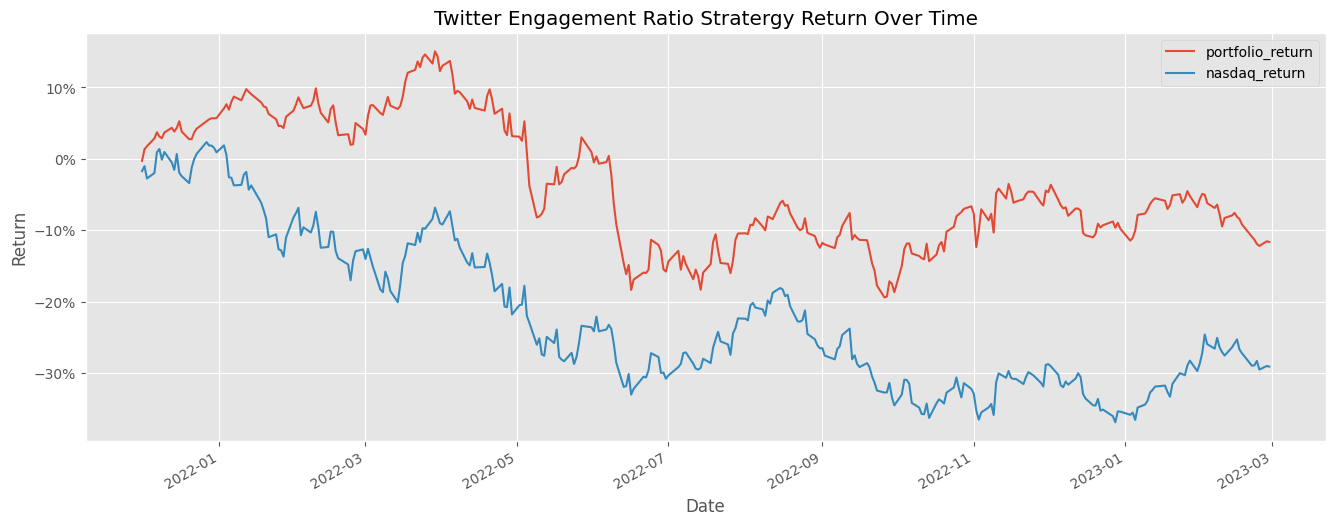

In [89]:
import matplotlib.ticker as mtick

portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize=(16,6))

plt.title('Twitter Engagement Ratio Stratergy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()